# STE Binary Network

In [1]:
# import torch base code
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from os import path
sys.path.append(path.join("..", "src"))
import c_torch
import matplotlib.pyplot as plt

**Helper Functions**

In [2]:
"""
Function : run_cmd
    
    runs a python script from within python and prints stdout to screen in real-time
    
    Args:
        cmd (string) : command to run as subprocess
        
    Ref: https://stackoverflow.com/questions/17411966/
"""

def run_cmd(cmd):
    
    # create subprocess
    proc = sub.Popen(cmd, stdout=sub.PIPE, universal_newlines=True)
    
    # read output line for line
    while proc.poll() is None:
        
        opt = proc.stdout.readline()
        print(opt)
    
    # print rest of output
    print(proc.stdout.read()) 
    
    return


"""
Function: mfccshow
    
    displays a tensor mfcc
    
        Args:
            mfcc (torch.Tensor) : image tensor (T, Freq)
            title (string)      : plot title
"""


def mfccshow(mfcc, title=''):

    # place image on CPU
    mfcc = mfcc.cpu()

    # plot MFCC
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.imshow(mfcc.transpose(0, 1))
    
    print("Mfcc Size (T, Freq) : {}".format(mfcc.size()))

    return

## Data Processing

Mfcc Size (T, Freq) : torch.Size([30, 39])


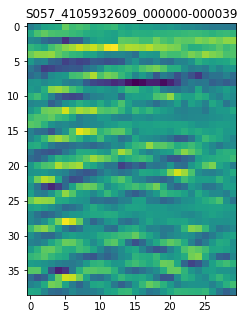

In [21]:
# imports
import torchvision.transforms as tf
from torch.utils.data import DataLoader
from c_torch.process_data import MfccDataset, Numpy2Tensor, CropMfcc, mfcc_collate

train_dl = DataLoader(
    
    dataset=MfccDataset(
        '~/Music/test/test.dd.npz',
        transform=tf.Compose([
            Numpy2Tensor(),
            CropMfcc(t=30, freq=39)
        ]),
        ret_keys=True
    ),
    
    batch_size=5,
    collate_fn=mfcc_collate,
    shuffle=True
)

keys, mfcc, seq_len = iter(train_dl).next()

# display MFCC
mfccshow(mfcc[4], title=keys[4])

## MFCC Auto Network

In [22]:
from c_torch.networks import MfccAuto

mfcc_auto = MfccAuto(
    input_size=39, 
    bnd=1
)

# display Network
print(mfcc_auto.name)
print(mfcc_auto)

MfccAuto
MfccAuto(
  (encoder): StackedRnnBase(
    (multilayer_rnn): ModuleList(
      (0): RNNBase(39, 20)
      (1): RNNBase(20, 60)
      (2): RNNBase(60, 120)
      (3): RNNBase(120, 1)
    )
  )
  (binarizer): Binarizer()
  (decoder): StackedRnnBase(
    (multilayer_rnn): ModuleList(
      (0): RNNBase(1, 120)
      (1): RNNBase(120, 60)
      (2): RNNBase(60, 20)
      (3): RNNBase(20, 39)
    )
  )
)


### Train

In [ ]:
cmd = " ".join([
    "python train.py",
    "--epochs", "20",
    "--gamma",  "0.1",
    "--learn_rate", "0.001"
    "--log",        "~/Projects/suzerospeech2019/src/c_torch/networks/logs",
    "--train", 
    "--valid",
    "--save",  "~/Projects/suzerospeech2019/src/c_torch/networks/logs",
    "--batch_size", "100"
    "--bottleneck_depth", "4"
    "--mfcc_width", "30"
    "--mfcc_height", "39"
    "--verbose"   
])

